<a href="https://colab.research.google.com/github/aaryagharmalkar/Forest_Cover_Type/blob/main/forest_cover_type.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1) Install kaggle
!pip install --quiet kaggle


In [2]:
from google.colab import files
uploaded = files.upload()  # choose kaggle.json from your machine
# After upload, move it to the right place and set permissions
!mkdir -p /root/.kaggle
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [3]:
# Download into current runtime directory
!kaggle competitions download -c forest-cover-type-prediction
# List downloaded zip(s)
!ls -lah


  0% 0.00/25.3M [00:00<?, ?B/s]
100% 25.3M/25.3M [00:00<00:00, 2.14GB/s]
total 26M
drwxr-xr-x 1 root root 4.0K Oct 24 08:52 .
drwxr-xr-x 1 root root 4.0K Oct 24 08:47 ..
drwxr-xr-x 4 root root 4.0K Oct 22 13:38 .config
-rw-r--r-- 1 root root  26M Dec 11  2019 forest-cover-type-prediction.zip
drwxr-xr-x 1 root root 4.0K Oct 22 13:39 sample_data


In [4]:
!unzip -q forest-cover-type-prediction.zip -d forest_data
!ls -lah forest_data


total 93M
drwxr-xr-x 2 root root 4.0K Oct 24 08:53 .
drwxr-xr-x 1 root root 4.0K Oct 24 08:53 ..
-rw-r--r-- 1 root root 4.8M Dec 11  2019 sampleSubmission.csv
-rw-r--r-- 1 root root 1.2M Dec 11  2019 sampleSubmission.csv.zip
-rw-r--r-- 1 root root  161 Dec 11  2019 test3.csv
-rw-r--r-- 1 root root  73M Dec 11  2019 test.csv
-rw-r--r-- 1 root root  12M Dec 11  2019 test.csv.zip
-rw-r--r-- 1 root root 2.0M Dec 11  2019 train.csv
-rw-r--r-- 1 root root 333K Dec 11  2019 train.csv.zip


In [15]:
# Cell 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [16]:
# Cell 2: Load the dataset
train = pd.read_csv("forest_data/train.csv")
test = pd.read_csv("forest_data/test.csv")
sample = pd.read_csv("forest_data/sampleSubmission.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Sample submission shape:", sample.shape)

train.head()


Train shape: (15120, 56)
Test shape: (565892, 55)
Sample submission shape: (565892, 2)


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [17]:
# Cell 3: Basic info
print("Train Info:")
print(train.info())
print("\nMissing values in train:", train.isnull().sum().sum())
print("Missing values in test:", test.isnull().sum().sum())


Train Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int

In [18]:
# Cell 4: Separate features and target
'''What it does:

X: Input features used for prediction

y: Target variable (forest cover type — integer 1 to 7)

Drops Id as it’s just an identifier, not a predictive feature

Why it’s important:
Machine learning models require:

X → features

y → target labels
Separating them prepares data for training.'''

X = train.drop(columns=["Cover_Type", "Id"])
y = train["Cover_Type"]

test_ids = test["Id"]
test = test.drop(columns=["Id"])

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (15120, 54)
Target shape: (15120,)


/tmp/ipython-input-4061150391.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


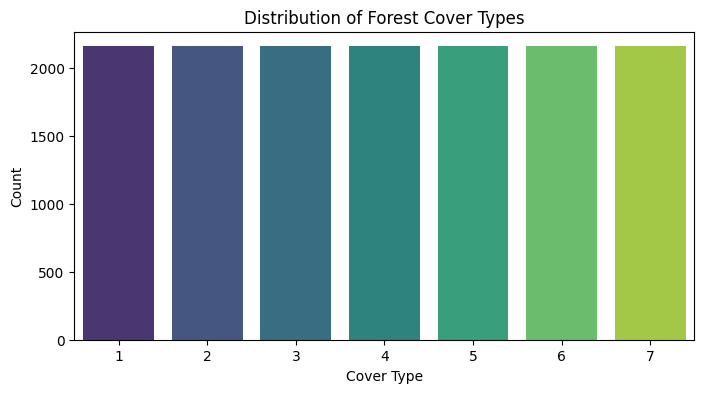

In [19]:
# Cell 5: Visualize class distribution
'''What it does:

Splits features into two categories:

Continuous columns: numerical variables (like Elevation, Aspect, etc.)

Categorical columns: one-hot encoded binary columns (like Soil_Type1, Wilderness_Area4)

Why it’s important:
Continuous and categorical variables need different preprocessing techniques:

Continuous → scaling (normalize values)

Categorical → usually left as is (0/1 binary already)'''

plt.figure(figsize=(8,4))
sns.countplot(x=y, palette="viridis")
plt.title("Distribution of Forest Cover Types")
plt.xlabel("Cover Type")
plt.ylabel("Count")
plt.show()


In [20]:
# Cell 6: Identify column types
'''What it does:

Standardizes continuous features so each has:

Mean = 0

Standard Deviation = 1

Why it’s important:
Different features have different scales (e.g., Elevation in thousands vs. Slope in tens).
Scaling ensures that no feature dominates due to large numerical values — this improves convergence and performance in models like Logistic Regression, SVM, and Neural Networks.'''

continuous_cols = [
    'Elevation', 'Aspect', 'Slope',
    'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

categorical_cols = [col for col in X.columns if 'Wilderness_Area' in col or 'Soil_Type' in col]

print("Continuous columns:", continuous_cols)
print("Categorical columns count:", len(categorical_cols))


Continuous columns: ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
Categorical columns count: 44


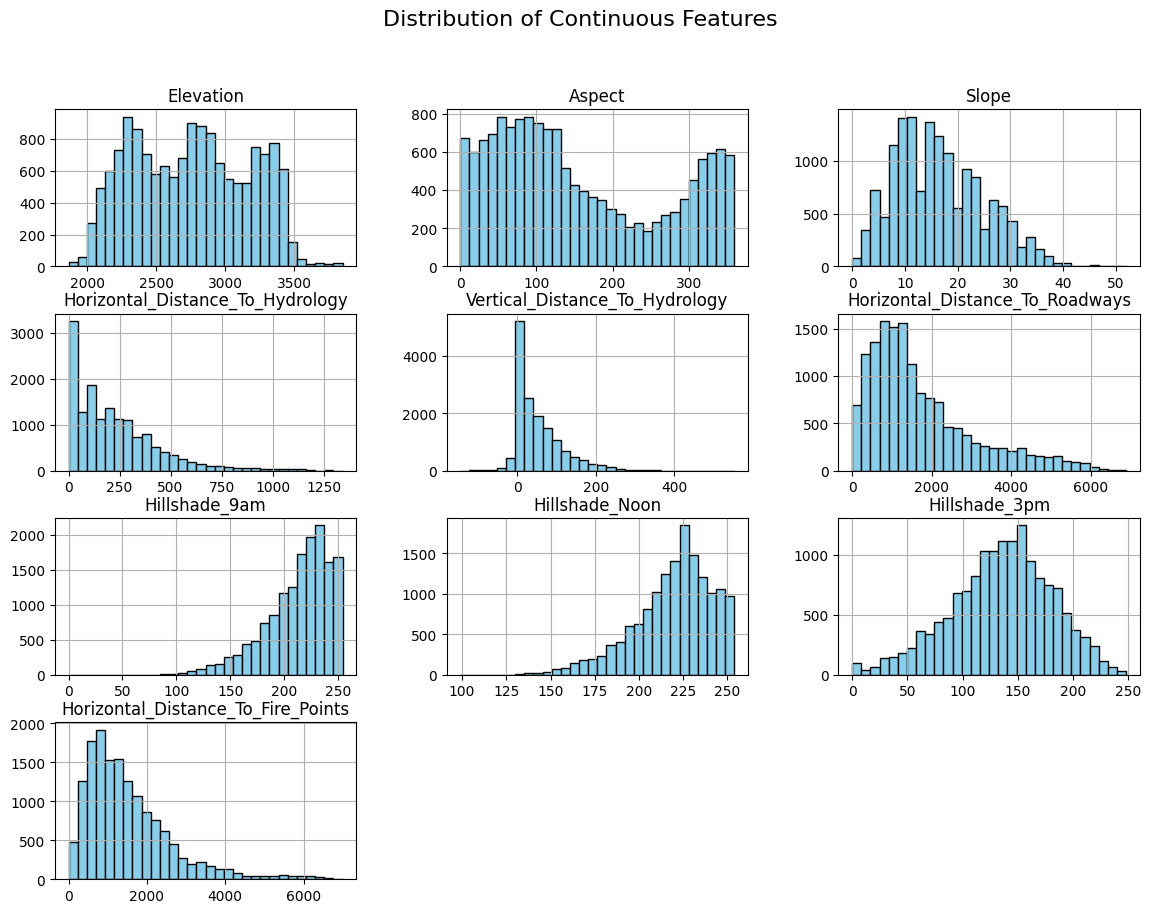

In [21]:
# Cell 7: Continuous feature histograms
X[continuous_cols].hist(figsize=(14,10), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Continuous Features", fontsize=16)
plt.show()


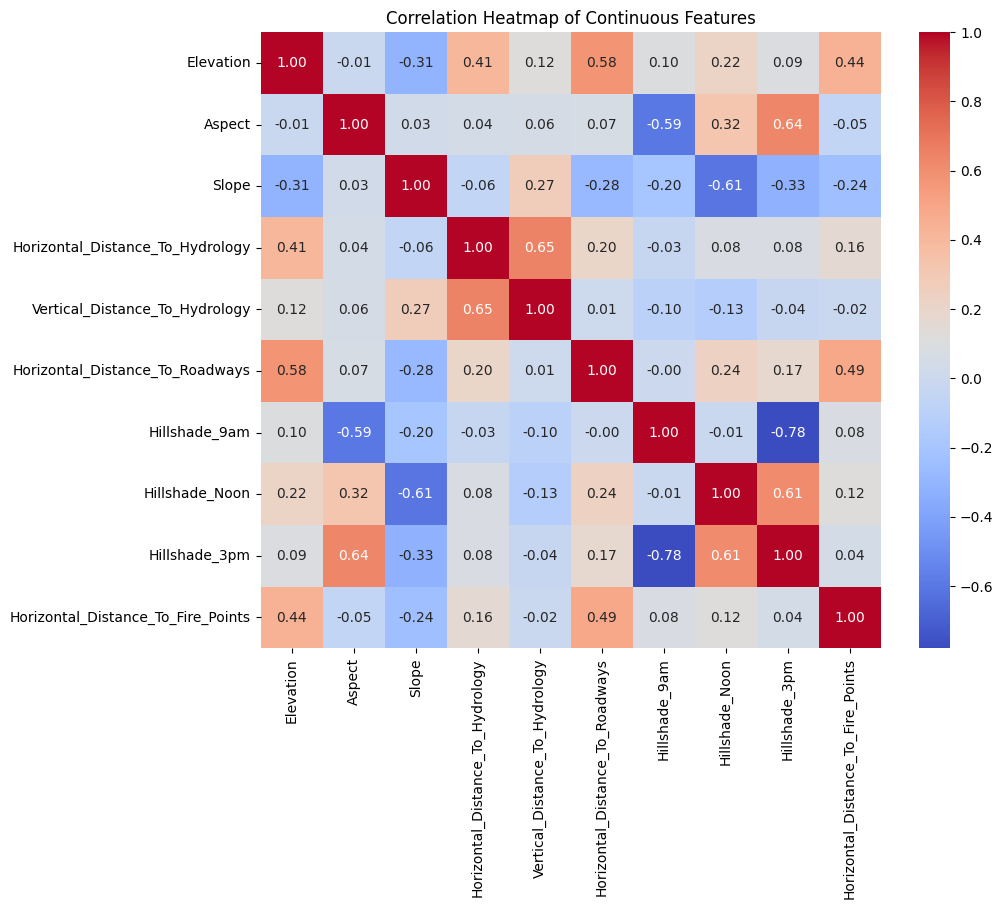

In [22]:
# Cell 8: Correlation heatmap (only continuous cols)
plt.figure(figsize=(10,8))
sns.heatmap(X[continuous_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Continuous Features")
plt.show()


In [23]:
# Cell 9: Scale continuous columns
scaler = StandardScaler()
X_scaled = X.copy()
test_scaled = test.copy()

X_scaled[continuous_cols] = scaler.fit_transform(X[continuous_cols])
test_scaled[continuous_cols] = scaler.transform(test[continuous_cols])

print("✅ Continuous features scaled successfully!")


✅ Continuous features scaled successfully!


In [24]:
# Cell 10: Combine scaled continuous + categorical columns
X_processed = X_scaled.copy()
test_processed = test_scaled.copy()

print("Processed train shape:", X_processed.shape)
print("Processed test shape:", test_processed.shape)


Processed train shape: (15120, 54)
Processed test shape: (565892, 54)


In [25]:
# Cell 11: Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

print("Train set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)


Train set shape: (12096, 54)
Validation set shape: (3024, 54)


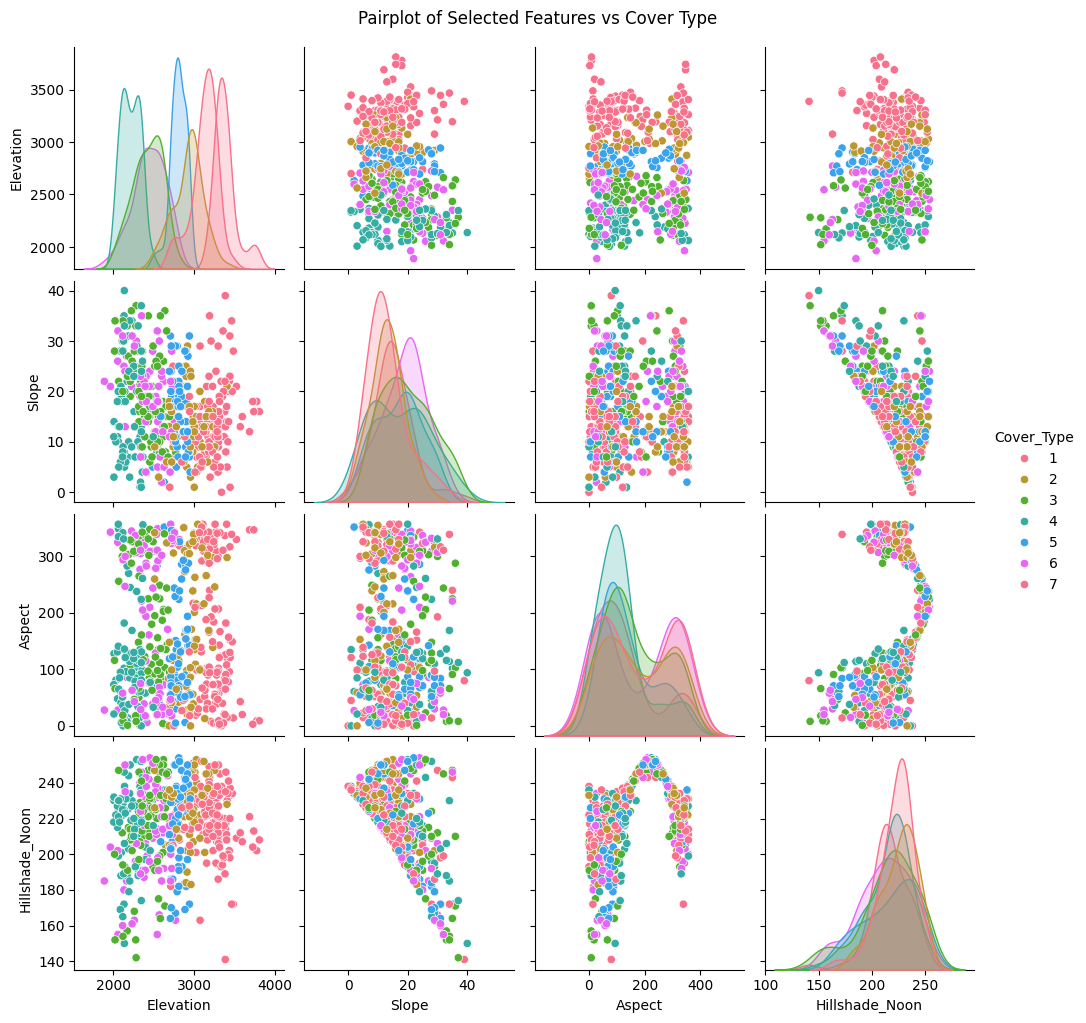

In [26]:
# Cell 12: Pairplot for a few numeric features (optional - for exploration)
sns.pairplot(train.sample(500)[["Elevation", "Slope", "Aspect", "Hillshade_Noon", "Cover_Type"]],
             hue="Cover_Type", palette="husl")
plt.suptitle("Pairplot of Selected Features vs Cover Type", y=1.02)
plt.show()


/tmp/ipython-input-2876258343.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features, y=top_features.index, palette="crest")


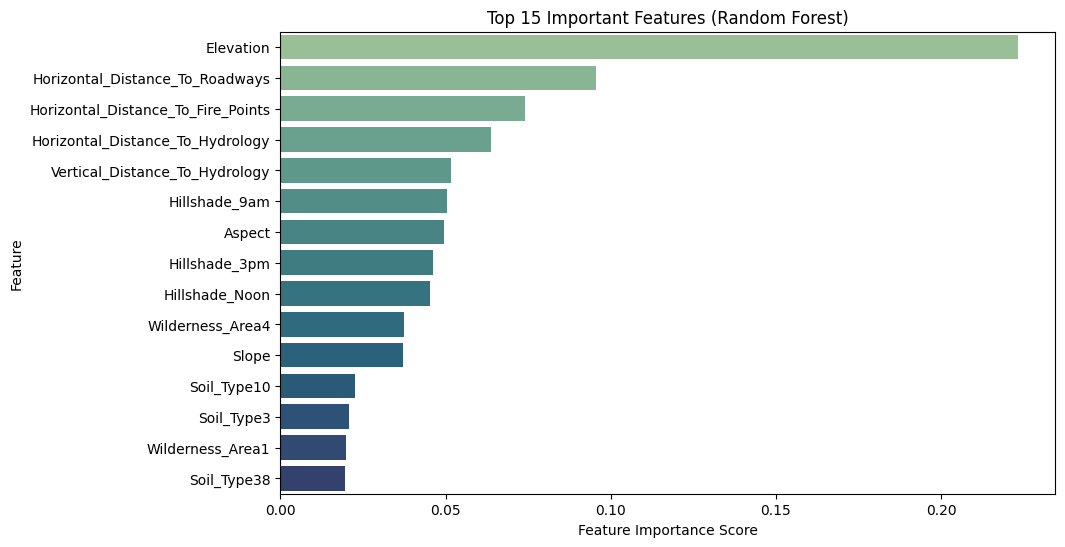

In [28]:
# Cell 16: Simple Random Forest for feature importance
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X_train.columns)
top_features = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=top_features, y=top_features.index, palette="crest")
plt.title("Top 15 Important Features (Random Forest)")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.show()


In [29]:
# Cell 17: Quick model accuracy
from sklearn.metrics import accuracy_score

y_pred = rf.predict(X_val)
acc = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy (simple RF): {acc:.4f}")


Validation Accuracy (simple RF): 0.8568


In [30]:
print("Processed Train Shape:", X_processed.shape)
print("Processed Test Shape:", test_processed.shape)


Processed Train Shape: (15120, 54)
Processed Test Shape: (565892, 54)


In [31]:
print(X_processed.columns.tolist())


['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']


In [32]:
X_processed[continuous_cols].describe().T[['mean', 'std']]


,mean,std
Elevation,3.609106e-16,1.000033
Aspect,1.203035e-16,1.000033
Slope,-2.048920e-16,1.000033
Horizontal_Distance_To_Hydrology,4.511382e-17,1.000033
Vertical_Distance_To_Hydrology,-3.759485e-18,1.000033
Horizontal_Distance_To_Roadways,8.270868e-17,1.000033
Hillshade_9am,-3.637302e-16,1.000033
Hillshade_Noon,4.812141e-16,1.000033
Hillshade_3pm,6.015177e-17,1.000033
Horizontal_Distance_To_Fire_Points,9.022765e-17,1.000033
